OK vs Not OK Percentage

Nombre de vaches sans condition (OK = 1) : 100031
Nombre de vaches avec condition (OK = 0) : 7634
Nombre total d'enregistrements           : 107665


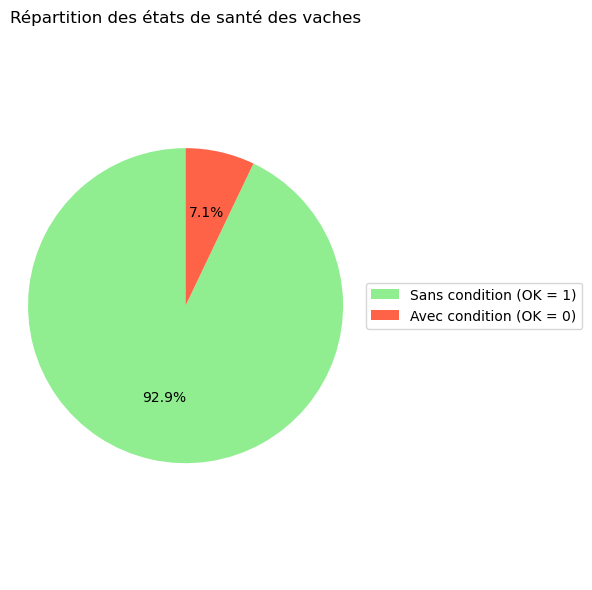

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/rouat/Downloads/dataset1-1.csv")

ok_counts = df['OK'].value_counts()

nb_ok = ok_counts.get(1, 0)
nb_non_ok = ok_counts.get(0, 0)
total = len(df)

print(f"Nombre de vaches sans condition (OK = 1) : {nb_ok}")
print(f"Nombre de vaches avec condition (OK = 0) : {nb_non_ok}")
print(f"Nombre total d'enregistrements           : {total}")


labels = ['Sans condition (OK = 1)', 'Avec condition (OK = 0)']
colors = ['lightgreen', 'tomato']
sizes = [nb_ok, nb_non_ok]

plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title('Répartition des états de santé des vaches')

plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()


Check if there are multiple conditions at the same time

In [ ]:

maladie_cols = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS', 'acidosis', 'other_disease']

df_non_ok = df[df['OK'] == 0].copy()

df_non_ok['nb_maladies'] = df_non_ok[maladie_cols].sum(axis=1)

# Garder seulement les lignes avec plus d'une maladie
multi_maladie = df_non_ok[df_non_ok['nb_maladies'] > 1].copy()

def get_maladies_presentes(row):
    return [col for col in maladie_cols if row[col] == 1]

multi_maladie['maladies_presentes'] = multi_maladie.apply(get_maladies_presentes, axis=1)

# Afficher les résultats
print(f"Nombre de cas avec plusieurs maladies : {len(multi_maladie)}")
print(multi_maladie[['cow', 'date', 'hour', 'maladies_presentes']])


Nombre de cas avec plusieurs maladies : 24
        cow        date  hour maladies_presentes
22676  6629  2019-02-27     0     [oestrus, LPS]
22677  6629  2019-02-27     1     [oestrus, LPS]
22678  6629  2019-02-27     2     [oestrus, LPS]
22679  6629  2019-02-27     3     [oestrus, LPS]
22680  6629  2019-02-27     4     [oestrus, LPS]
22681  6629  2019-02-27     5     [oestrus, LPS]
22682  6629  2019-02-27     6     [oestrus, LPS]
22683  6629  2019-02-27     7     [oestrus, LPS]
22684  6629  2019-02-27     8     [oestrus, LPS]
22685  6629  2019-02-27     9     [oestrus, LPS]
22686  6629  2019-02-27    10     [oestrus, LPS]
22687  6629  2019-02-27    11     [oestrus, LPS]
22688  6629  2019-02-27    12     [oestrus, LPS]
22689  6629  2019-02-27    13     [oestrus, LPS]
22690  6629  2019-02-27    14     [oestrus, LPS]
22691  6629  2019-02-27    15     [oestrus, LPS]
22692  6629  2019-02-27    16     [oestrus, LPS]
22693  6629  2019-02-27    17     [oestrus, LPS]
22694  6629  2019-02-27   

Distribution of Conditions

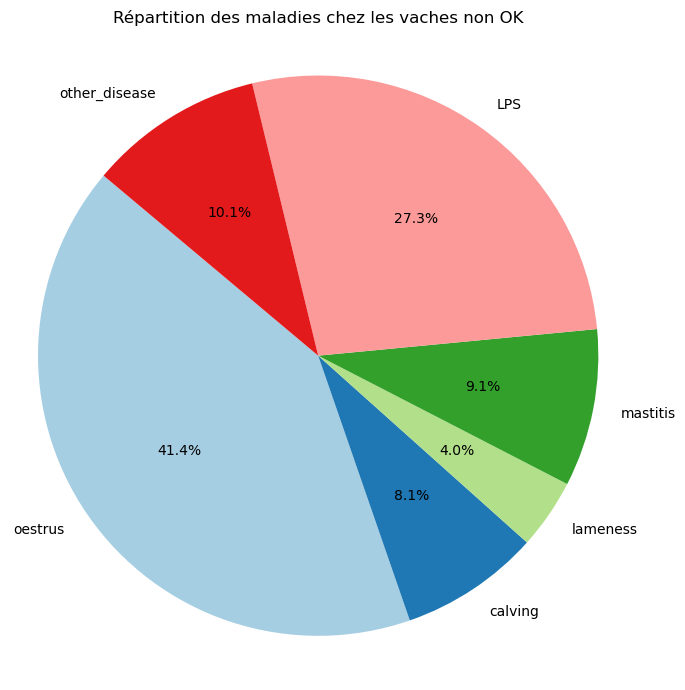

In [ ]:


df_non_ok = df[df['OK'] == 0]
maladie_cols = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS', 'acidosis', 'other_disease']
df_maladies = df_non_ok[maladie_cols]
maladie_counts = df_maladies.sum()
maladie_counts = maladie_counts[maladie_counts > 0]

plt.figure(figsize=(7, 7))
colors = plt.cm.Paired.colors
plt.pie(maladie_counts, labels=maladie_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Répartition des maladies chez les vaches non OK")
plt.axis('equal')
plt.tight_layout()
plt.show()


Check Hour Frequency per Date

Distribution des heures en pourcentage :
hour
24    95.348837
23     1.744186
16     1.162791
14     0.581395
12     0.581395
22     0.581395
Name: proportion, dtype: float64


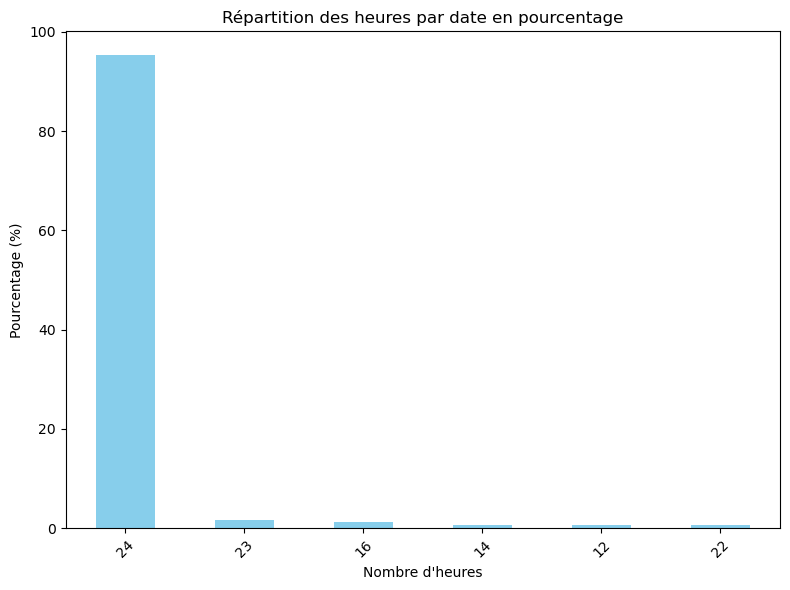

In [ ]:
df['date'] = pd.to_datetime(df['date'])

hour_counts = df.groupby('date')['hour'].nunique()

# Calculer la distribution des valeurs uniques d'heures et les convertir en pourcentages
hour_distribution = hour_counts.value_counts(normalize=True) * 100

print("Distribution des heures en pourcentage :")
print(hour_distribution)

plt.figure(figsize=(8, 6))
hour_distribution.plot(kind='bar', color='skyblue')
plt.title('Répartition des heures par date en pourcentage')
plt.xlabel('Nombre d\'heures')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tracking Oestrus Events by Cow

   cow_id event_date event_date_before event_date_after  total_hours_event  \
0    6601 2018-12-10        2018-12-09       2018-12-11                 24   
1    6610 2019-02-01        2019-01-31       2019-02-02                 24   
2    6610 2019-03-13        2019-03-12       2019-03-14                 24   
3    6612 2019-02-01        2019-01-31       2019-02-02                 24   
4    6612 2019-02-21        2019-02-20       2019-02-22                 24   
5    6612 2019-03-07        2019-03-06       2019-03-08                 24   

   oestrus_hours_event  total_hours_before  oestrus_hours_before  \
0                   24                  24                     0   
1                   24                  24                     0   
2                   24                  24                     0   
3                   24                  24                     0   
4                   24                  24                     0   
5                   24                  24   

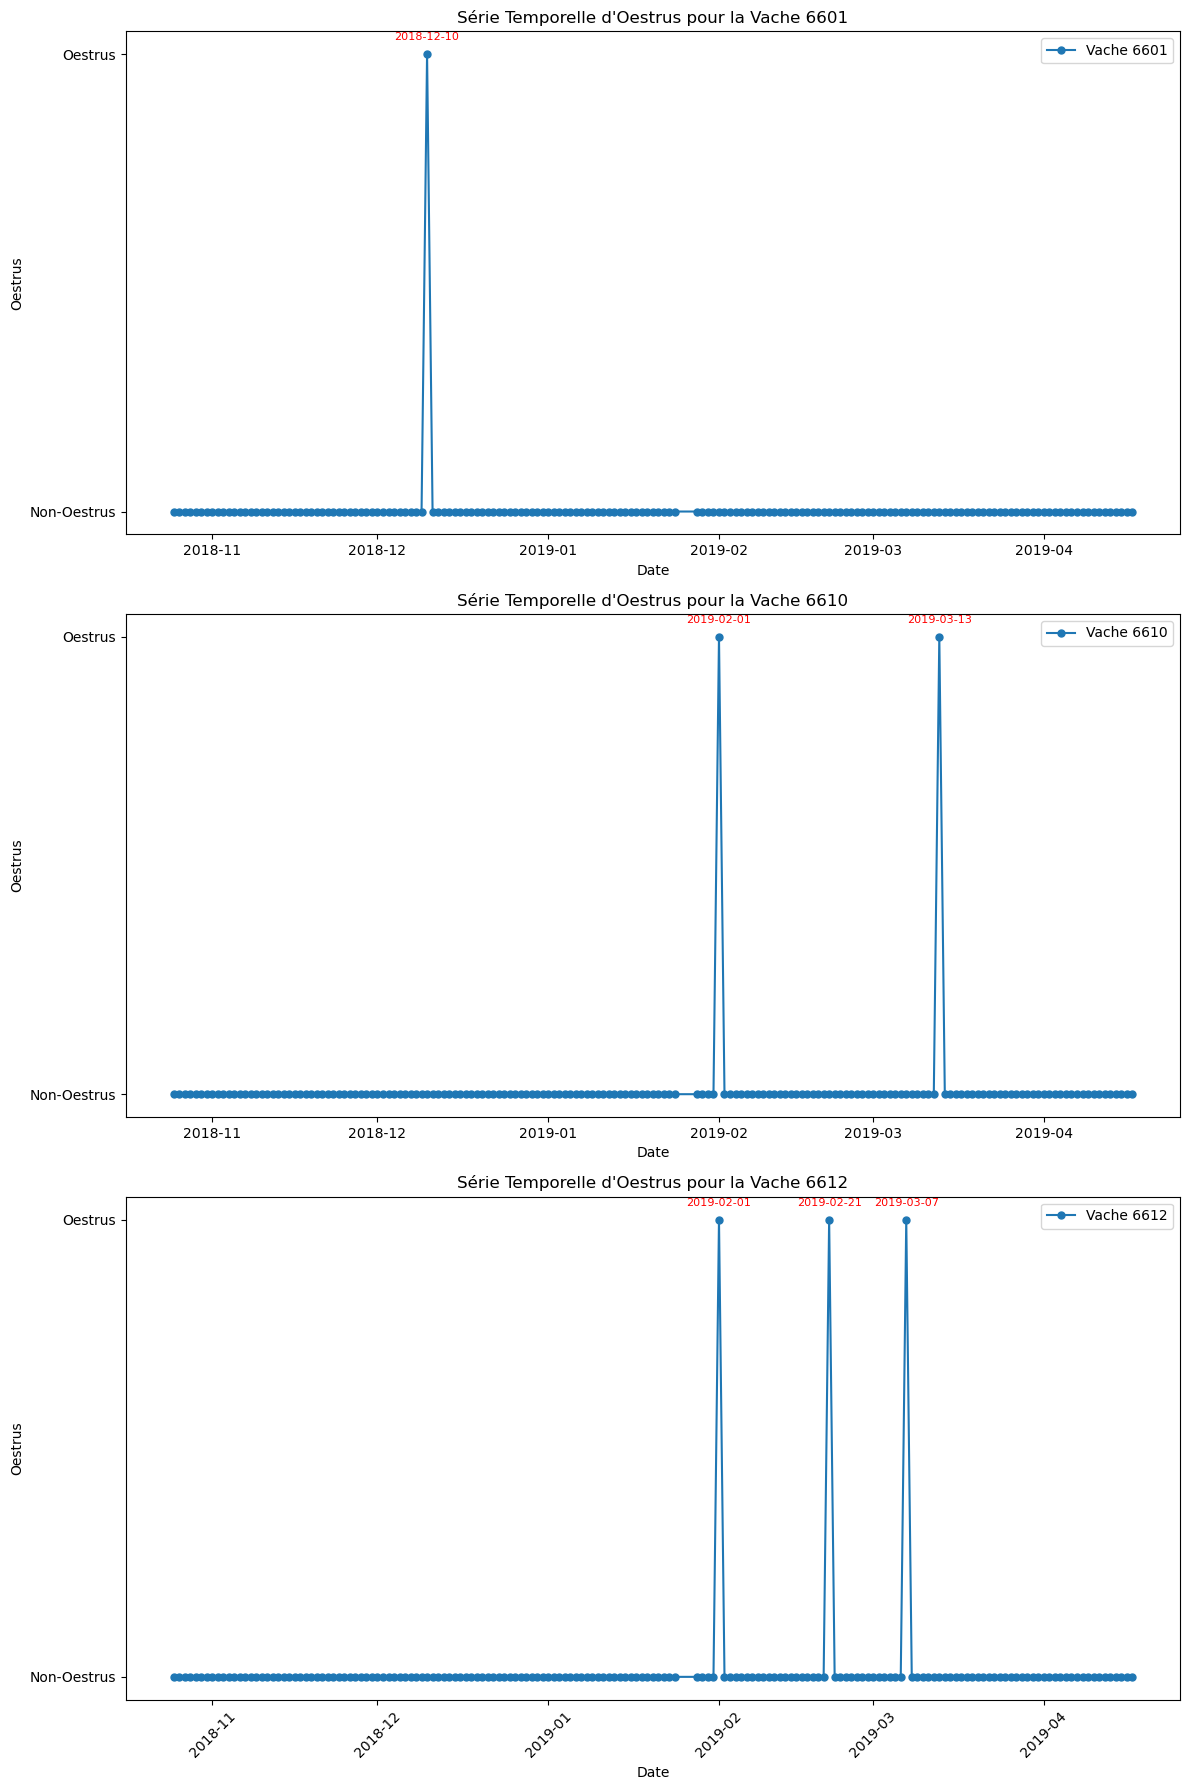

In [ ]:

from datetime import timedelta



df['date'] = pd.to_datetime(df['date'])

# Liste des IDs de vaches à analyser
cow_ids = [6601, 6610, 6612]

def count_oestrus_hours(date, cow_data):
    # Filtrer les heures de cette journée
    day_data = cow_data[cow_data['date'] == date]
    total_hours = len(day_data)
    oestrus_hours = (day_data['oestrus'] == 1).sum()
    return total_hours, oestrus_hours

oestrus_info = []

for cow_id in cow_ids:
    df_cow = df[df['cow'] == cow_id]

    df_cow_daily = df_cow.groupby('date')['oestrus'].max()

    for event_date in df_cow_daily[df_cow_daily == 1].index:
        oestrus_hours, oestrus_hours_event = count_oestrus_hours(event_date, df_cow)

        day_before = event_date - timedelta(days=1)
        total_hours_before, oestrus_hours_before = count_oestrus_hours(day_before, df_cow) if day_before in df_cow_daily.index else (0, 0)

        day_after = event_date + timedelta(days=1)
        total_hours_after, oestrus_hours_after = count_oestrus_hours(day_after, df_cow) if day_after in df_cow_daily.index else (0, 0)

        oestrus_info.append({
            'cow_id': cow_id,
            'event_date': event_date,
            'event_date_before': day_before,
            'event_date_after': day_after,
            'total_hours_event': oestrus_hours,
            'oestrus_hours_event': oestrus_hours_event,
            'total_hours_before': total_hours_before,
            'oestrus_hours_before': oestrus_hours_before,
            'total_hours_after': total_hours_after,
            'oestrus_hours_after': oestrus_hours_after
        })

oestrus_df = pd.DataFrame(oestrus_info)

print(oestrus_df)

fig, axes = plt.subplots(len(cow_ids), 1, figsize=(12, 6 * len(cow_ids)))

if len(cow_ids) == 1:
    axes = [axes]

# Tracer la série temporelle d'oestrus pour chaque vache
for i, cow_id in enumerate(cow_ids):
    df_cow = df[df['cow'] == cow_id]
    df_cow_daily = df_cow.groupby('date')['oestrus'].max()

    axes[i].plot(df_cow_daily.index, df_cow_daily.values, marker='o', label=f'Vache {cow_id}', linestyle='-', markersize=5)

    for idx, row in oestrus_df[oestrus_df['cow_id'] == cow_id].iterrows():
        axes[i].annotate(f"{row['event_date'].strftime('%Y-%m-%d')}",
                         (row['event_date'], 1),
                         textcoords="offset points",
                         xytext=(0, 10),
                         ha='center',
                         fontsize=8, color='red')

    axes[i].set_title(f"Série Temporelle d'Oestrus pour la Vache {cow_id}")
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Oestrus')
    axes[i].set_yticks([0, 1])
    axes[i].set_yticklabels(['Non-Oestrus', 'Oestrus'])

    axes[i].legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Cow Behavior Tracking Around Oestrus

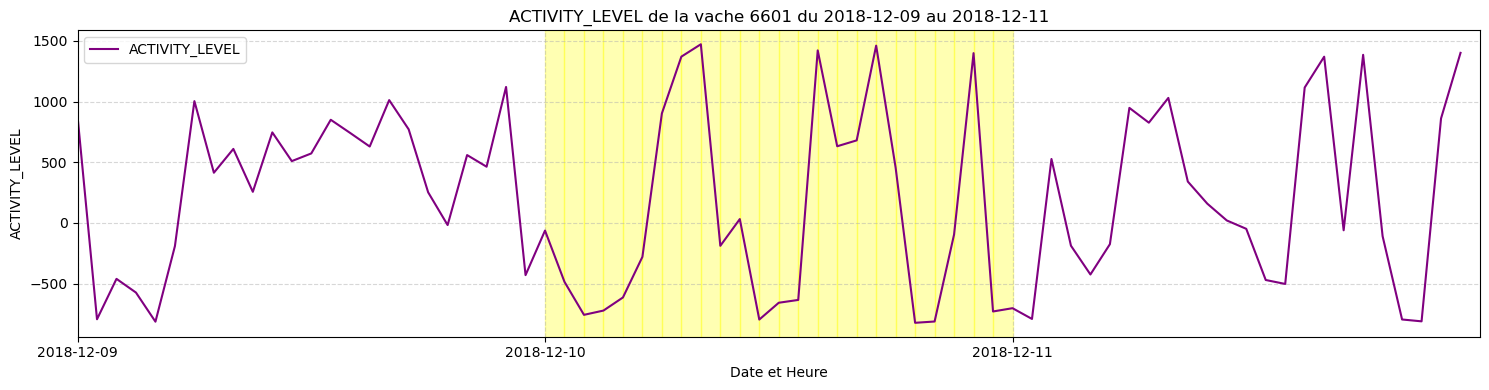

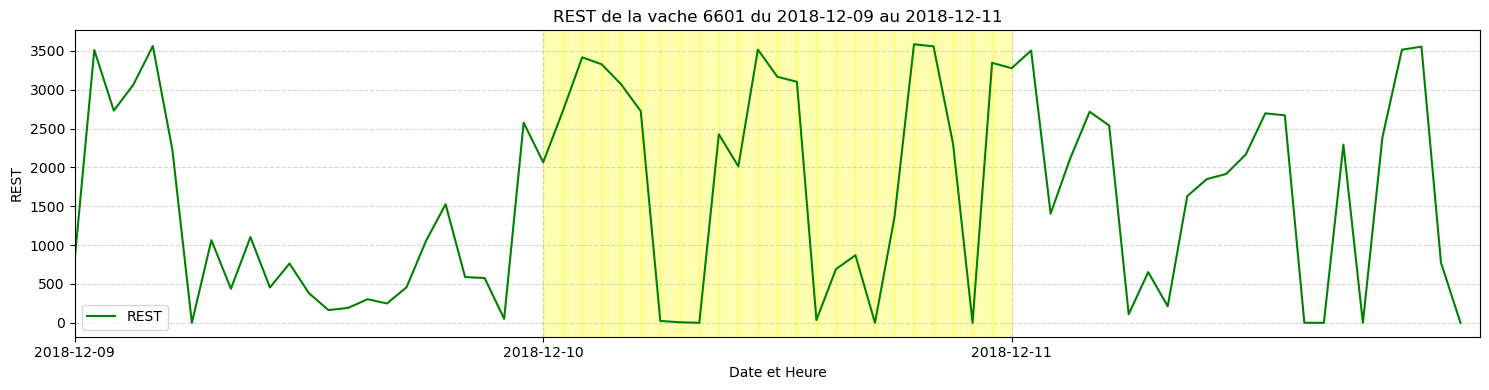

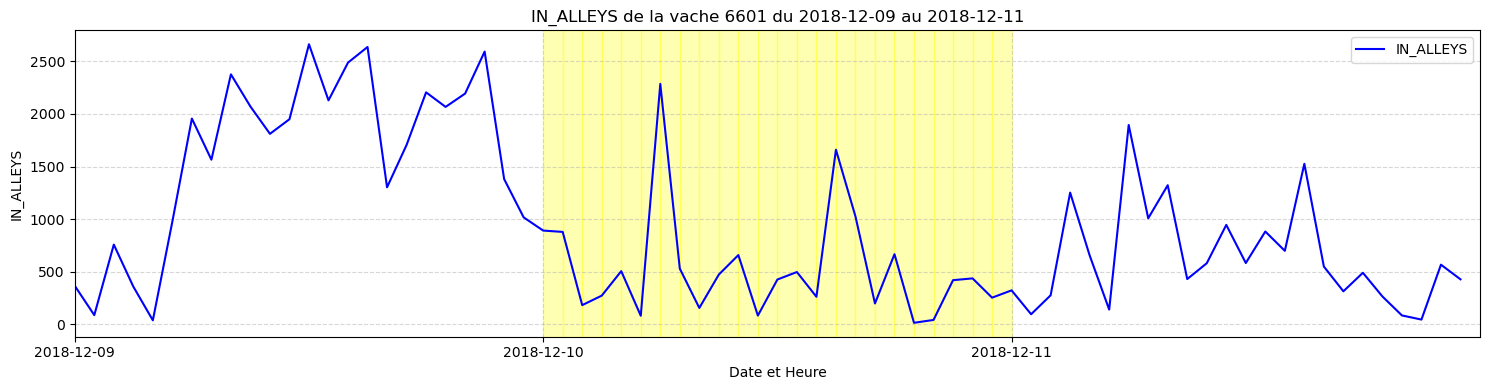

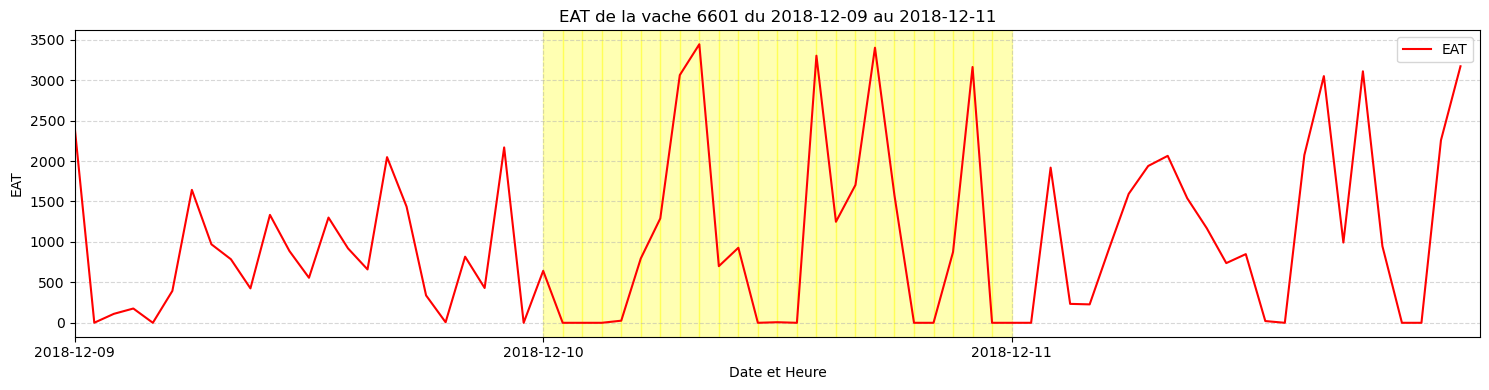

In [ ]:



df['date'] = pd.to_datetime(df['date'])
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')

def plot_cow_behavior_individual(cow_id, day_before, oestrus_day, day_after):
    start_date = pd.to_datetime(day_before)
    middle_date = pd.to_datetime(oestrus_day)
    end_date = pd.to_datetime(day_after)


    cow_data = df[(df['cow'] == cow_id) &
                  (df['date'] >= start_date) &
                  (df['date'] <= end_date)].copy()

    if cow_data.empty:
        print(f"Aucune donnée pour la vache {cow_id} entre {start_date.date()} et {end_date.date()}.")
        return

    behavior_columns = ['ACTIVITY_LEVEL', 'REST', 'IN_ALLEYS', 'EAT']
    colors = ['purple', 'green', 'blue', 'red']

    for behavior, color in zip(behavior_columns, colors):
        plt.figure(figsize=(15, 4))
        plt.plot(cow_data['datetime'], cow_data[behavior], label=behavior, color=color)

        for hour in cow_data[cow_data['oestrus'] == 1]['datetime']:
            plt.axvspan(hour, hour + timedelta(hours=1), color='yellow', alpha=0.3)

        plt.title(f"{behavior} de la vache {cow_id} du {start_date.date()} au {end_date.date()}")
        plt.xlabel('Date et Heure')
        plt.ylabel(behavior)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(pd.date_range(start=start_date, end=end_date, freq='D'))
        plt.xlim([cow_data['datetime'].min(), cow_data['datetime'].max() + timedelta(hours=1)])
        plt.tight_layout()
        plt.legend()
        plt.show()

# Appel de la fonction
plot_cow_behavior_individual(
    cow_id=6601,
    day_before='2018-12-09',
    oestrus_day='2018-12-10',
    day_after='2018-12-11'
)


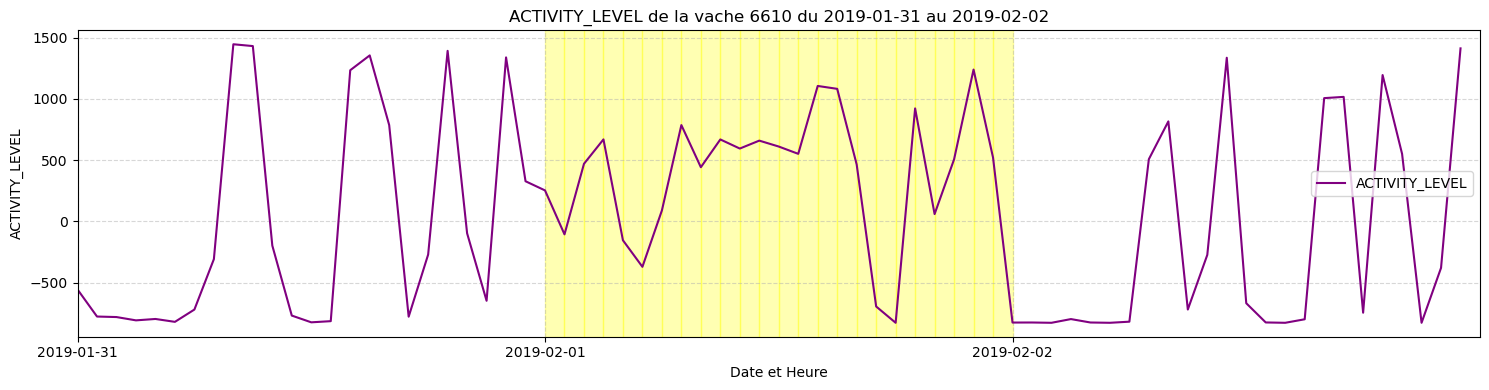

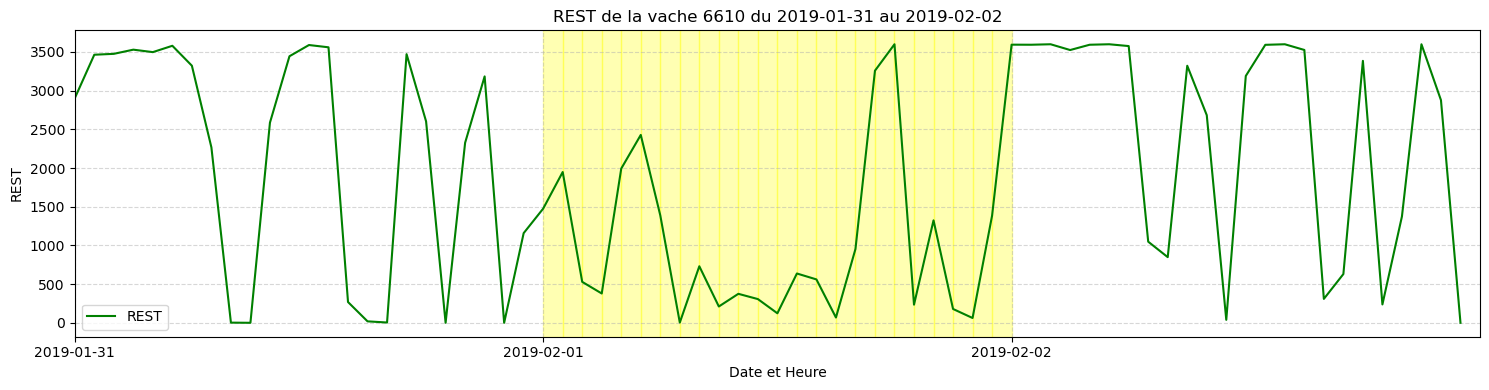

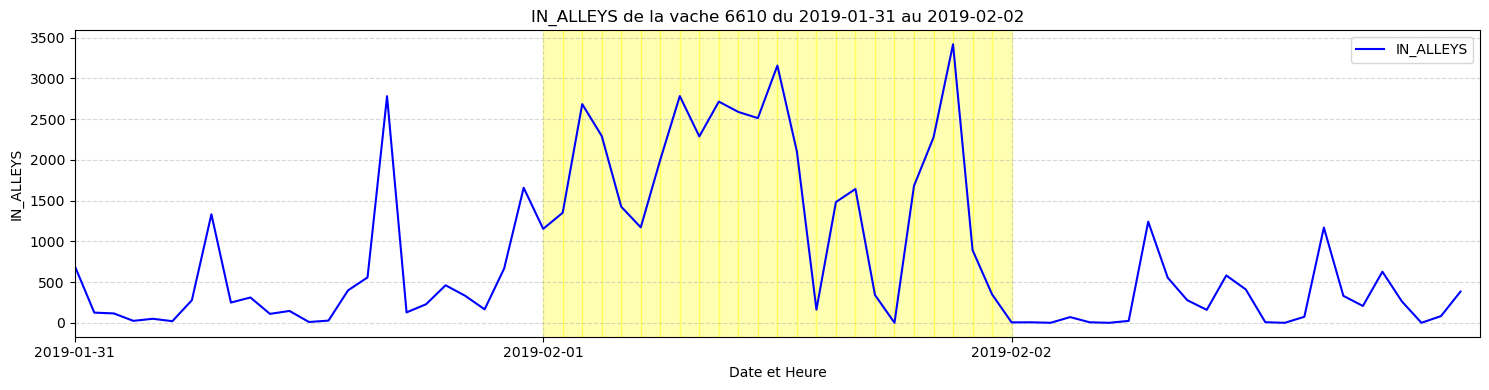

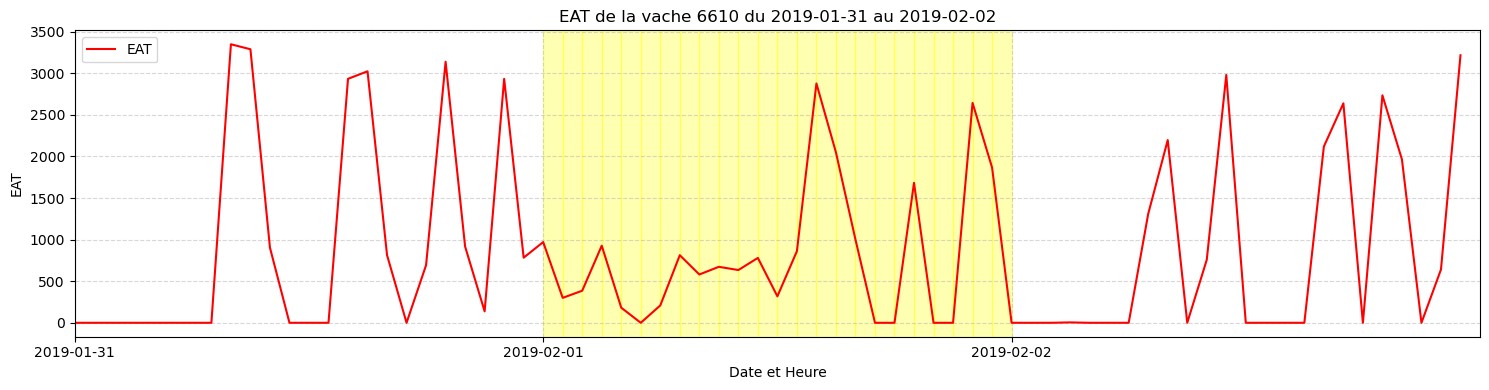

In [ ]:
plot_cow_behavior_individual(6610, '2019-01-31', '2019-02-01', '2019-02-02')

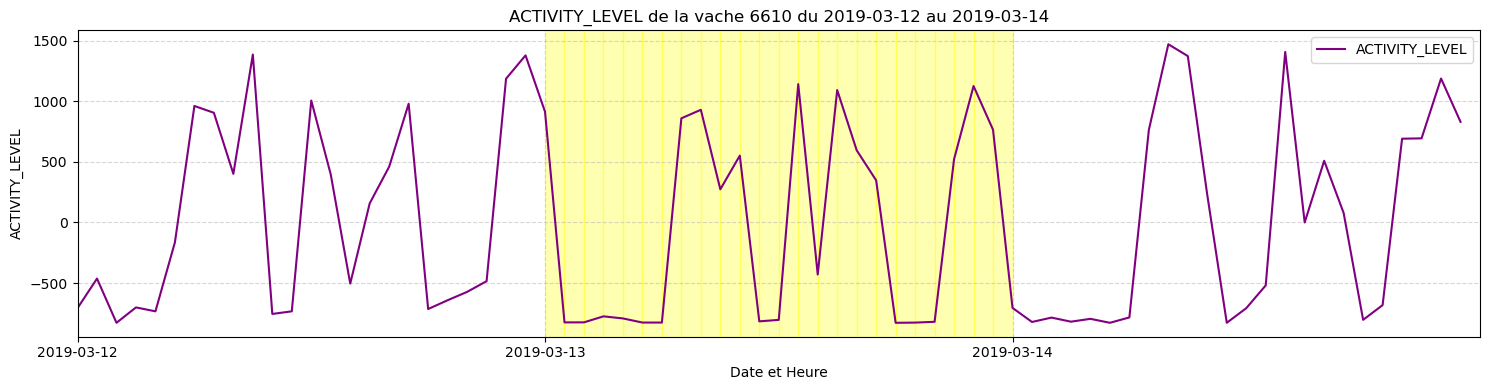

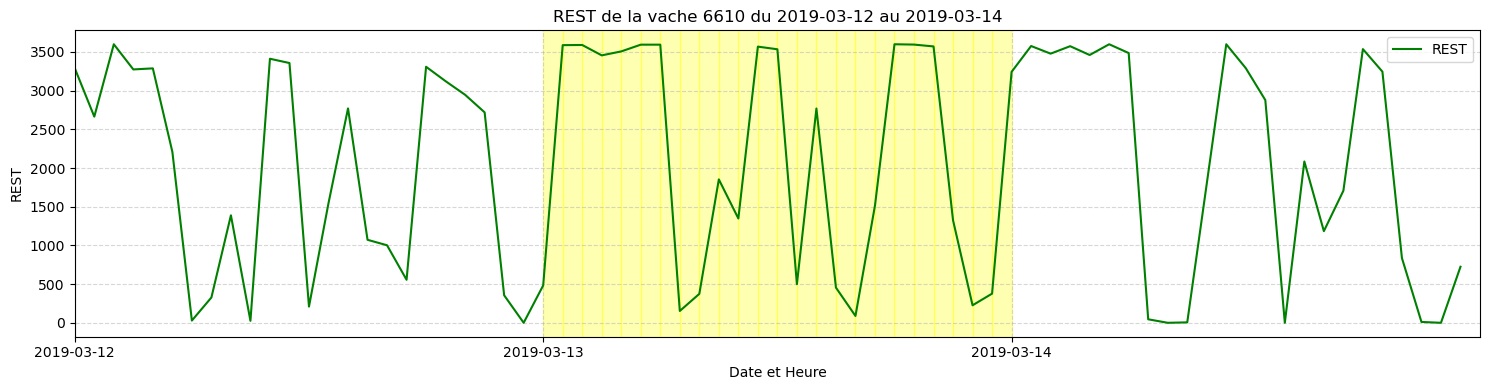

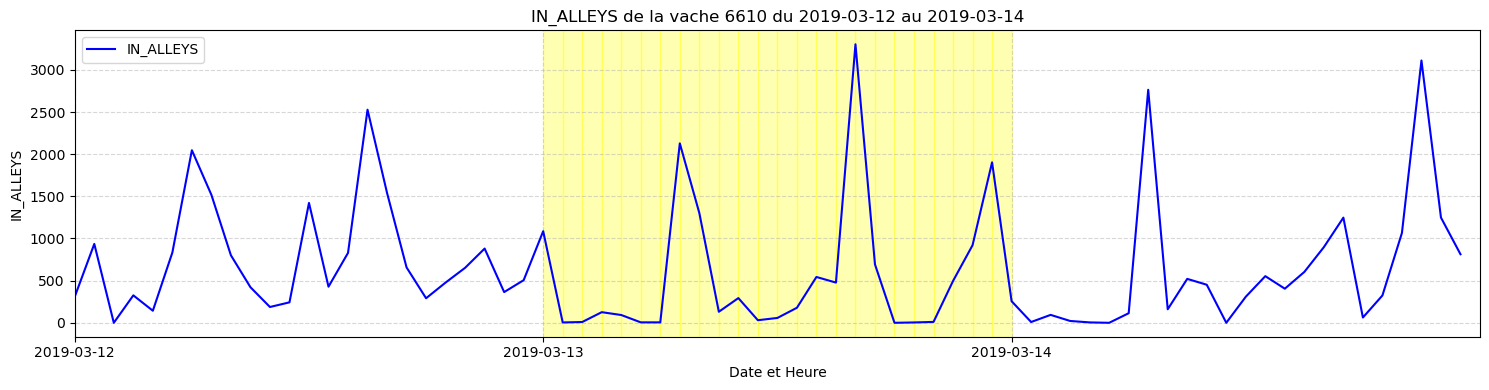

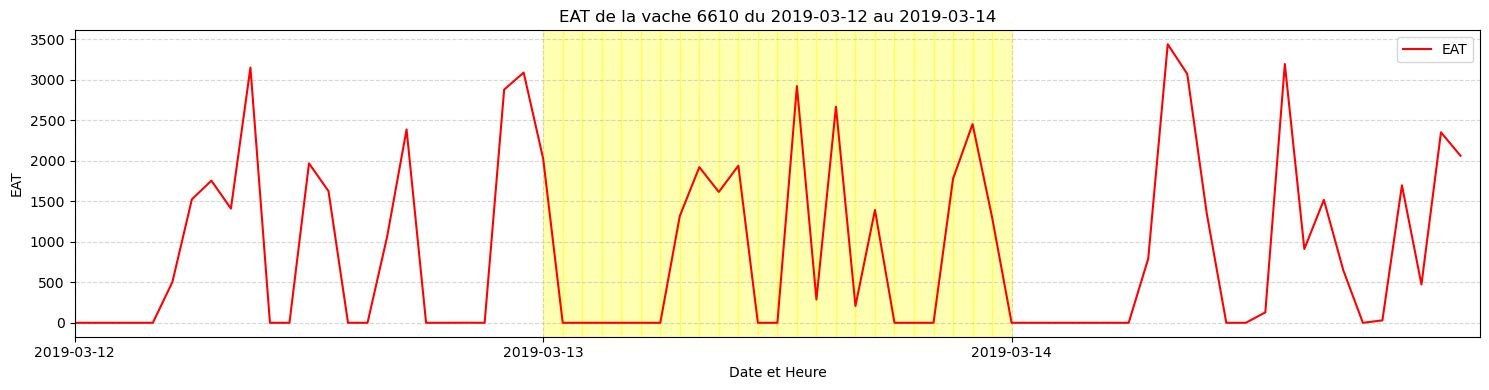

In [ ]:
plot_cow_behavior_individual(6610, '2019-03-12', '2019-03-13', '2019-03-14')
#plot_cow_behavior_individual(6612, '2019-01-31', '2019-02-01', '2019-02-02')
#plot_cow_behavior_individual(6612, '2019-02-20', '2019-02-21', '2019-02-22')
#plot_cow_behavior_individual(6612, '2019-03-06', '2019-03-07', '2019-03-08')

IDs of cows with diseases and the dates of the conditions

In [ ]:

conditions = ['calving', 'lameness', 'mastitis', 'LPS', 'acidosis', 'other_disease']
result_data = {condition: [] for condition in conditions}

for condition in conditions:
    condition_data = df[df[condition] == 1]

    for _, row in condition_data.iterrows():
        result_data[condition].append({
            'Cow ID': row['cow'],
            'Date': row['date']
        })

result_dfs = {condition: pd.DataFrame(result_data[condition]) for condition in conditions}

for condition, result_df in result_dfs.items():
    print(f"Tableau pour la condition '{condition}':")
    print(result_df)
    print("\n")


Tableau pour la condition 'calving':
     Cow ID       Date
0      6613 2018-11-30
1      6613 2018-11-30
2      6613 2018-11-30
3      6613 2018-11-30
4      6613 2018-11-30
..      ...        ...
187    6750 2018-11-29
188    6750 2018-11-29
189    6750 2018-11-29
190    6750 2018-11-29
191    6750 2018-11-29

[192 rows x 2 columns]


Tableau pour la condition 'lameness':
    Cow ID       Date
0     6634 2018-11-07
1     6634 2018-11-07
2     6634 2018-11-07
3     6634 2018-11-07
4     6634 2018-11-07
..     ...        ...
91    6750 2019-02-13
92    6750 2019-02-13
93    6750 2019-02-13
94    6750 2019-02-13
95    6750 2019-02-13

[96 rows x 2 columns]


Tableau pour la condition 'mastitis':
     Cow ID       Date
0      6612 2019-01-10
1      6612 2019-01-10
2      6612 2019-01-10
3      6612 2019-01-10
4      6612 2019-01-10
..      ...        ...
211    6686 2019-01-10
212    6686 2019-01-10
213    6686 2019-01-10
214    6686 2019-01-10
215    6686 2019-01-10

[216 rows x 2 colum

Tracking mastite Events by Cow

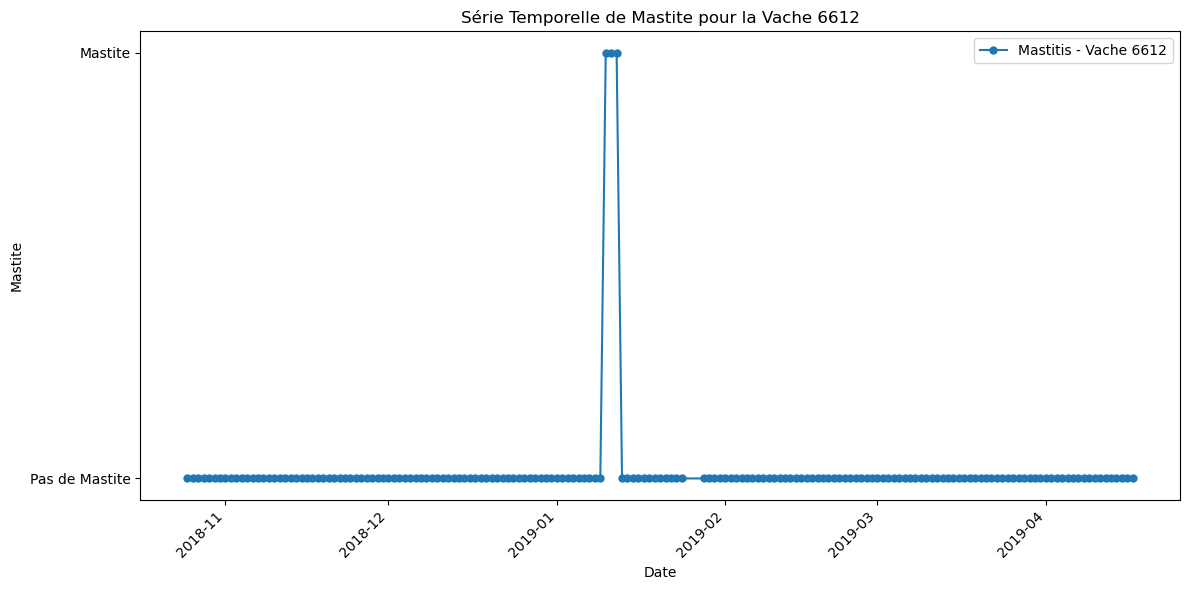

Dates où il y a mastite pour la vache 6612 :
2019-01-10
2019-01-11
2019-01-12


In [ ]:


def load_and_plot_mastitis_data(file_path, cow_id):
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df_cow = df[df['cow'] == cow_id]

    df_cow_daily = df_cow.groupby('date')['mastitis'].max()
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(df_cow_daily.index, df_cow_daily.values, marker='o', label=f'Mastitis - Vache {cow_id}', linestyle='-', markersize=5)
    ax.set_title(f"Série Temporelle de Mastite pour la Vache {cow_id}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Mastite')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Pas de Mastite', 'Mastite'])

    ax.legend()

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

    mastitis_dates = df_cow_daily[df_cow_daily == 1].index
    print(f"Dates où il y a mastite pour la vache {cow_id} :")
    for date in mastitis_dates:
        print(date.strftime('%Y-%m-%d'))

# Exemple d'utilisation
file_path = "C:/Users/rouat/Downloads/dataset1-1.csv"
cow_id = 6612
load_and_plot_mastitis_data(file_path, cow_id)


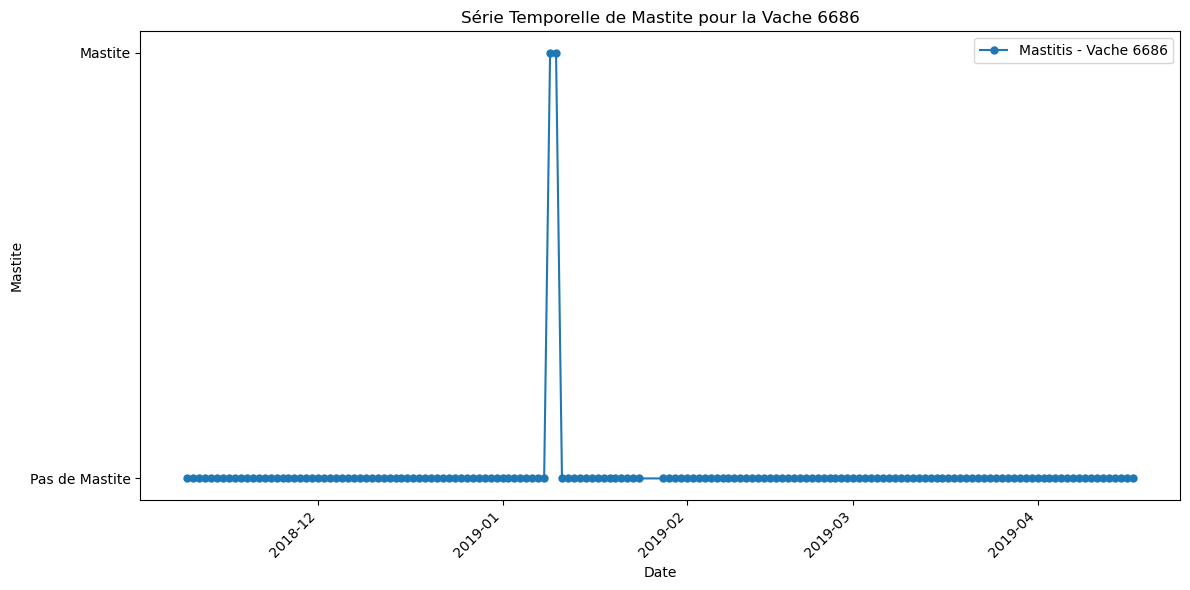

Dates où il y a mastite pour la vache 6686 :
2019-01-09
2019-01-10


In [ ]:
cow_id = 6686
load_and_plot_mastitis_data(file_path, cow_id)

Verify the Existence of Previous and Next Days for a Cow's Condition

In [ ]:


def check_previous_day_exists(file_path, cow_id, given_date):
    df = pd.read_csv(file_path)


    df['date'] = pd.to_datetime(df['date'])

    df_cow = df[df['cow'] == cow_id]

    previous_day = given_date - timedelta(days=1)

    if previous_day in df_cow['date'].values:
        print(f"Le jour précédent {previous_day.strftime('%Y-%m-%d')} est présent dans le dataset.")
        return True
    else:
        print(f"Le jour précédent {previous_day.strftime('%Y-%m-%d')} est MANQUANT dans le dataset.")
        return False


def check_next_day_exists(file_path, cow_id, given_date):
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df_cow = df[df['cow'] == cow_id]
    next_day = given_date + timedelta(days=1)

    if next_day in df_cow['date'].values:
        print(f"Le jour suivant {next_day.strftime('%Y-%m-%d')} est présent dans le dataset.")
        return True
    else:
        print(f"Le jour suivant {next_day.strftime('%Y-%m-%d')} est MANQUANT dans le dataset.")
        return False


# Exemple d'utilisation
file_path = "C:/Users/rouat/Downloads/dataset1-1.csv"
cow_id = 6612
day1 = pd.to_datetime('2019-01-10')
day2 = pd.to_datetime('2019-01-12')

check_previous_day_exists(file_path, cow_id, day1)

check_next_day_exists(file_path, cow_id, day2)


Le jour précédent 2019-01-09 est présent dans le dataset.
Le jour suivant 2019-01-13 est présent dans le dataset.


True

In [ ]:
check_previous_day_exists(file_path, 6686, pd.to_datetime('2019-01-09'))
check_next_day_exists(file_path, 6686, pd.to_datetime('2019-01-10'))

Le jour précédent 2019-01-08 est présent dans le dataset.
Le jour suivant 2019-01-11 est présent dans le dataset.


True

Analysis of Cow with Mastitis Activity

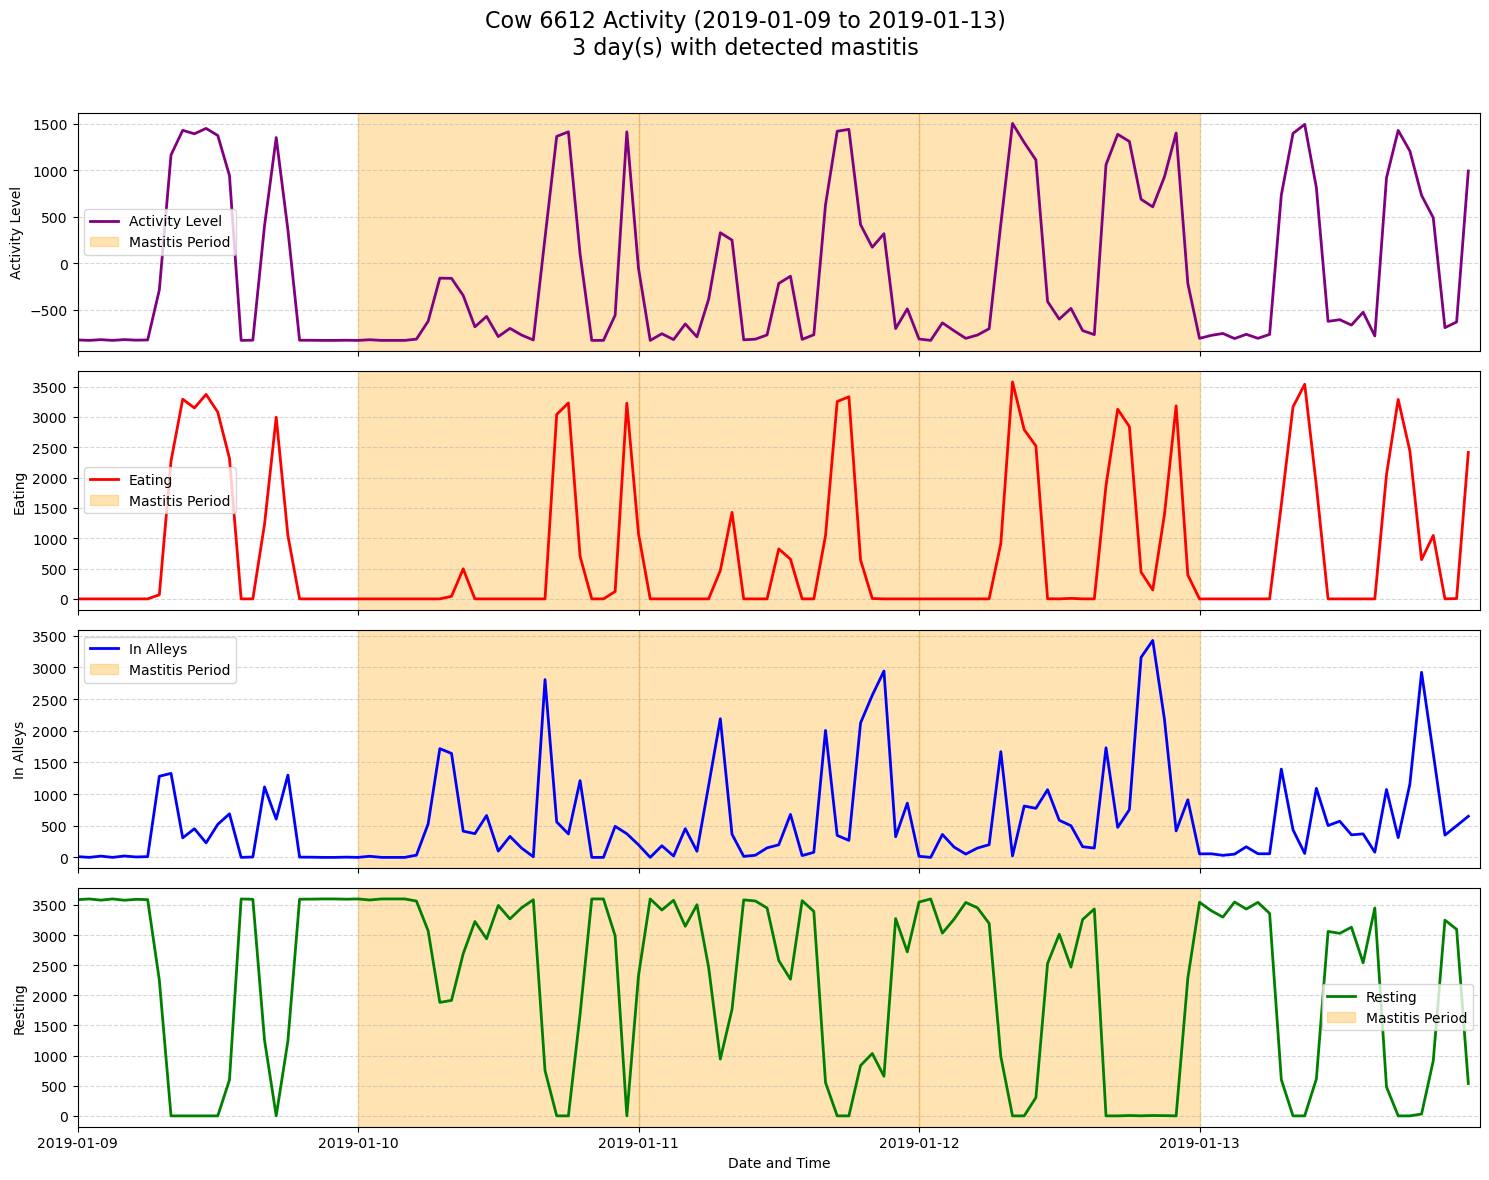

In [ ]:


df['date'] = pd.to_datetime(df['date'])
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')

def plot_cow_activity_with_mastitis(cow_id, analysis_start_day, analysis_end_day):

    start_date = pd.to_datetime(analysis_start_day)
    end_date = pd.to_datetime(analysis_end_day)

    cow_data = df[(df['cow'] == cow_id) &
                 (df['date'] >= start_date) &
                 (df['date'] <= end_date)].copy()

    if cow_data.empty:
        print(f"No data for cow {cow_id} between {start_date.date()} and {end_date.date()}.")
        return


    mastitis_days = cow_data[cow_data['mastitis'] == 1]['date'].unique()

    fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True)


    behaviors = {
        'ACTIVITY_LEVEL': ('Activity Level', 'purple'),
        'EAT': ('Eating', 'red'),
        'IN_ALLEYS': ('In Alleys', 'blue'),
        'REST': ('Resting', 'green')
    }

    for i, (behavior, (label, color)) in enumerate(behaviors.items()):
        axs[i].plot(cow_data['datetime'], cow_data[behavior], label=label, color=color, linewidth=2)


        for mastitis_day in mastitis_days:
            axs[i].axvspan(mastitis_day, mastitis_day + timedelta(days=1),
                           color='orange', alpha=0.3, label='Mastitis Period' if mastitis_day == mastitis_days[0] else "")

        axs[i].set_ylabel(label)
        axs[i].grid(True, linestyle='--', alpha=0.5)
        axs[i].legend()

    title = f"Cow {cow_id} Activity ({start_date.date()} to {end_date.date()})"
    if len(mastitis_days) > 0:
        title += f"\n{len(mastitis_days)} day(s) with detected mastitis"
    fig.suptitle(title, fontsize=16)

    axs[3].set_xlabel('Date and Time')

    plt.xticks(pd.date_range(start=start_date, end=end_date, freq='D'))
    plt.xlim([cow_data['datetime'].min(), cow_data['datetime'].max() + timedelta(hours=1)])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_cow_activity_with_mastitis(
    cow_id=6612,
    analysis_start_day='2019-01-09',
    analysis_end_day='2019-01-13'
)

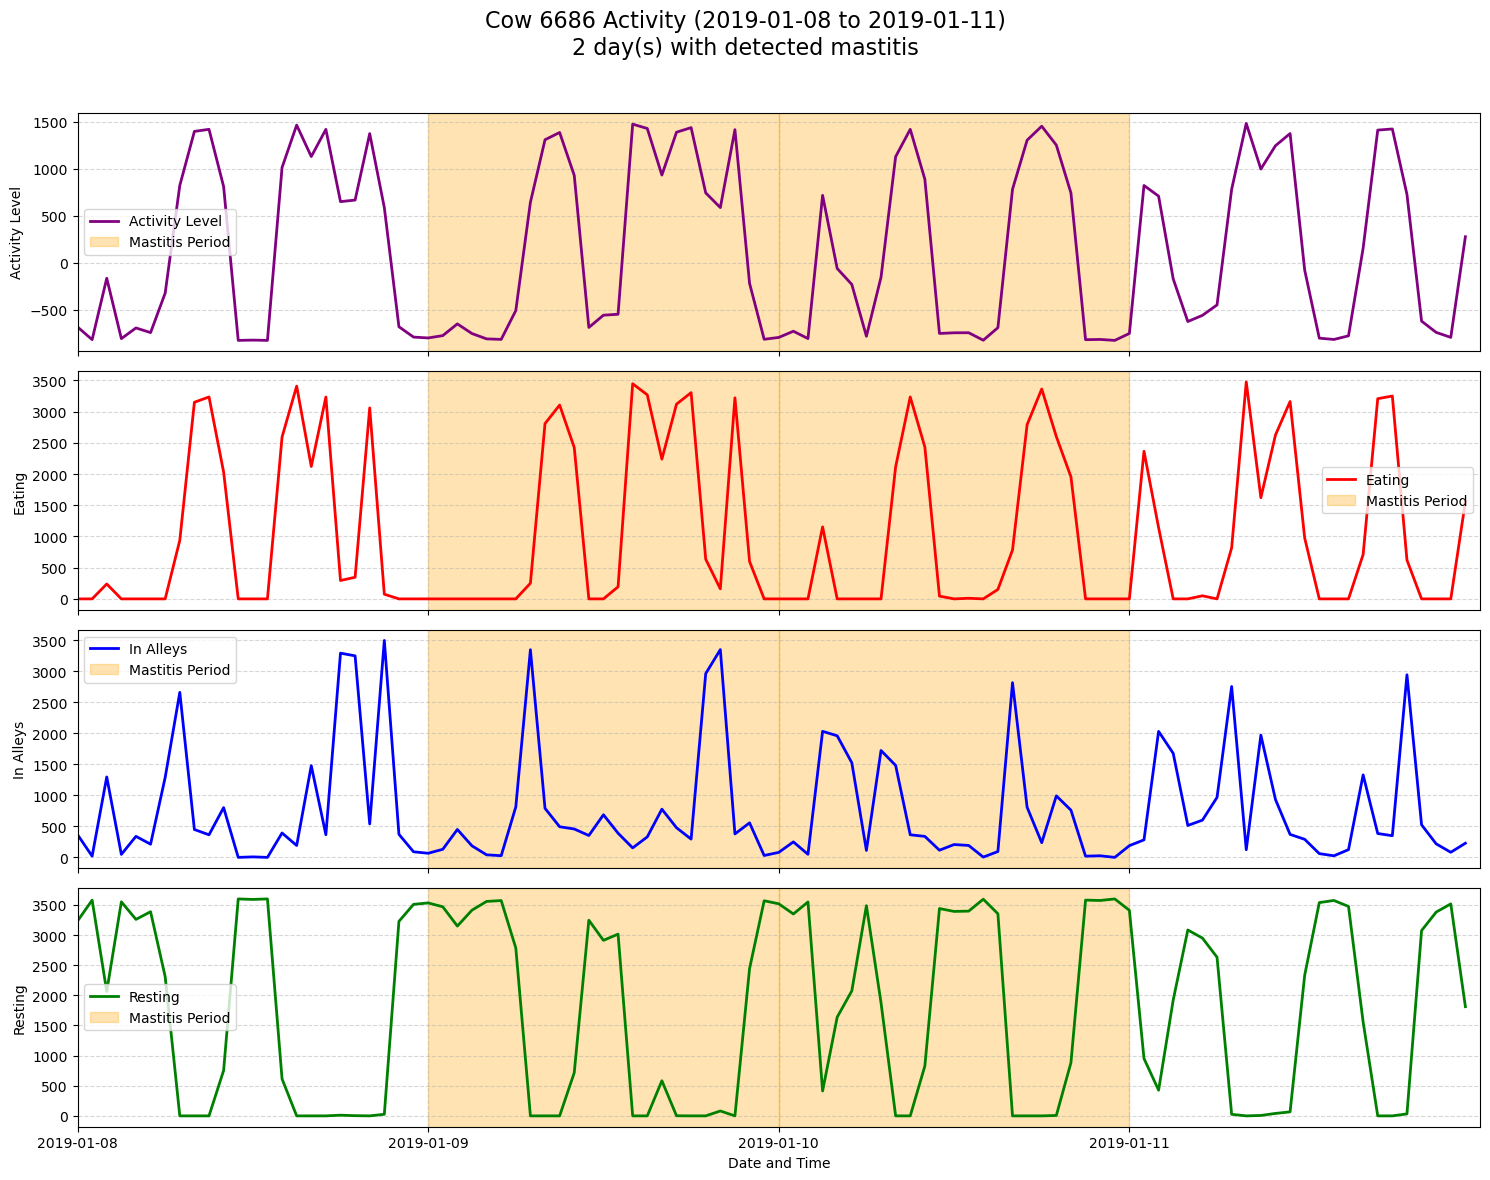

In [ ]:
plot_cow_activity_with_mastitis(
    cow_id=6686,
    analysis_start_day='2019-01-08',
    analysis_end_day='2019-01-11'
)

check for missing days

In [ ]:
import pandas as pd

def check_missing_days_for_all_cows(df):
    df['date'] = pd.to_datetime(df['date'])

    df = df.sort_values(by=['cow', 'date'])

    result = []

    for cow_id, cow_data in df.groupby('cow'):
        date_diff = cow_data['date'].diff().dt.days

        missing_days = date_diff[date_diff > 1]

        for missing_day in missing_days.index:
            start_date = cow_data.loc[missing_day, 'date']
            end_date = cow_data.loc[missing_day - 1, 'date']

            missing_range = pd.date_range(end_date + pd.Timedelta(days=1), start_date - pd.Timedelta(days=1), freq='D')

            for missing in missing_range:
                result.append({
                    'Cow ID': cow_id,
                    'Missing Day': missing
                })

    missing_days_df = pd.DataFrame(result)

    if not missing_days_df.empty:
        print("Missing days found:")
        print(missing_days_df)
    else:
        print("No missing days found for all cows.")

check_missing_days_for_all_cows(df)


Missing days found:
    Cow ID Missing Day
0     6601  2019-01-25
1     6601  2019-01-26
2     6601  2019-01-27
3     6610  2019-01-25
4     6610  2019-01-26
..     ...         ...
79    6750  2019-01-26
80    6750  2019-01-27
81    7600  2019-01-25
82    7600  2019-01-26
83    7600  2019-01-27

[84 rows x 2 columns]


check for missing hours

In [ ]:
def check_missing_hours_only(df):
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by=['cow', 'date', 'hour'])

    result = []
    total_missing_hours = 0
    total_gaps = 0

    for cow_id, cow_data in df.groupby('cow'):
        cow_data = cow_data.reset_index(drop=True)

        for i in range(1, len(cow_data)):
            prev_date = cow_data.loc[i - 1, 'date']
            prev_hour = cow_data.loc[i - 1, 'hour']
            curr_date = cow_data.loc[i, 'date']
            curr_hour = cow_data.loc[i, 'hour']

            day_diff = (curr_date - prev_date).days

            if day_diff == 0:
                hour_diff = curr_hour - prev_hour
            elif day_diff == 1 and prev_hour == 23 and curr_hour == 0:
                hour_diff = 1
            elif day_diff == 1:
                hour_diff = (24 - prev_hour - 1) + curr_hour + 1
            else:
                continue

            if hour_diff > 1:
                missing_hours = []
                for h in range(1, hour_diff):
                    new_hour = (prev_hour + h) % 24
                    new_date = prev_date + pd.Timedelta(days=(prev_hour + h) // 24)
                    missing_hours.append((new_date.date(), new_hour))

                result.append({
                    'Cow ID': cow_id,
                    'From': f"{prev_date.date()} {prev_hour}h",
                    'To': f"{curr_date.date()} {curr_hour}h",
                    'Missing Hours': missing_hours
                })

                total_missing_hours += hour_diff - 1
                total_gaps += 1

    missing_hours_df = pd.DataFrame(result)

    if not missing_hours_df.empty:
        print(f"⏰ {total_gaps} gap(s) detected with a total of {total_missing_hours} missing hours.")
        display(missing_hours_df)
        missing_hours_df.to_csv('missing_hours.csv', index=False)

    else:
        print(" No missing hours detected for consecutive days.")

# Appel de la fonction
check_missing_hours_only(df)


⏰ 119 gap(s) detected with a total of 371 missing hours.


,Cow ID,From,To,Missing Hours
0,6601,2019-01-29 7h,2019-01-29 10h,"[(2019-01-29, 8), (2019-01-29, 9)]"
1,6601,2019-02-12 17h,2019-02-12 19h,"[(2019-02-12, 18)]"
2,6601,2019-03-18 15h,2019-03-19 1h,"[(2019-03-18, 16), (2019-03-18, 17), (2019-03-..."
3,6601,2019-03-31 1h,2019-03-31 3h,"[(2019-03-31, 2)]"
4,6610,2019-01-29 7h,2019-01-29 10h,"[(2019-01-29, 8), (2019-01-29, 9)]"
...,...,...,...,...
114,6750,2019-03-31 1h,2019-03-31 3h,"[(2019-03-31, 2)]"
115,7600,2019-01-29 7h,2019-01-29 10h,"[(2019-01-29, 8), (2019-01-29, 9)]"
116,7600,2019-02-12 17h,2019-02-12 19h,"[(2019-02-12, 18)]"
117,7600,2019-03-18 15h,2019-03-19 1h,"[(2019-03-18, 16), (2019-03-18, 17), (2019-03-..."
